In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

from utils import add_complexity_to_metadata

In [86]:
metadata = pd.read_parquet('/workspaces/repos/randomstats/github/metadata.parquet').dropna()
metadata = add_complexity_to_metadata(metadata)
metadata

,calls,assignments,attributes,size,is_ipynb,complexity
chunk_id,,,,,,
4444d3cdff850ebe6ce372c7b867141a2d041f11,31.0,18.0,24.0,2176.0,False,0.172107
92eea3f82b5e926c9a8d6568a2b3eb351199bf9e,3.0,2.0,4.0,590.0,False,0.024374
d8108f44778865705e71acaf17442a499afbc5d0,0.0,1.0,0.0,2278.0,False,0.031695
e66ae67333542402587a359a3a84554c27444aad,6.0,6.0,4.0,886.0,False,0.046665
1d6cb5c0c1a8f8d441bb85db936dd202ae3dc58f,6.0,4.0,13.0,876.0,False,0.051324
...,...,...,...,...,...,...
79e8c8fcb9d1293b01a25327c5193a3ec2149dd7,8.0,5.0,5.0,540.0,False,0.043811
55d9448fc5f4015cf76f7246de39ce8424870ee0,0.0,0.0,0.0,3984.0,True,0.049601
8bd51a5a60142e8e839697d0ead4cdaa2a16d64c,39.0,14.0,79.0,3727.0,False,0.262118


In [73]:
def millions_formatter(x, pos):
    return f'{x / 1_000_000:.1f}M'

def thousands_formatter(x, pos):
    return f'{x / 1_000:.1f}K'

In [74]:
def show_plot(df, bin_width=0.2, bin_number=10, format_scale='M'):
    bin_edges = [w*bin_width for w in range(0, bin_number)]

    formatters = {'M': millions_formatter, 'k': thousands_formatter}

    plt.figure(figsize=(10, 6))
    counts, bins, _ = plt.hist(df, bins=bin_edges, alpha=0.75, edgecolor='black')
    plt.xlabel('Complexity')
    plt.ylabel('Frequency')
    plt.title('Distribution of Complexity')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(formatters[format_scale]))
    plt.grid(True)
    plt.xticks(bin_edges)

    plt.show()

## Complexity

#### All files

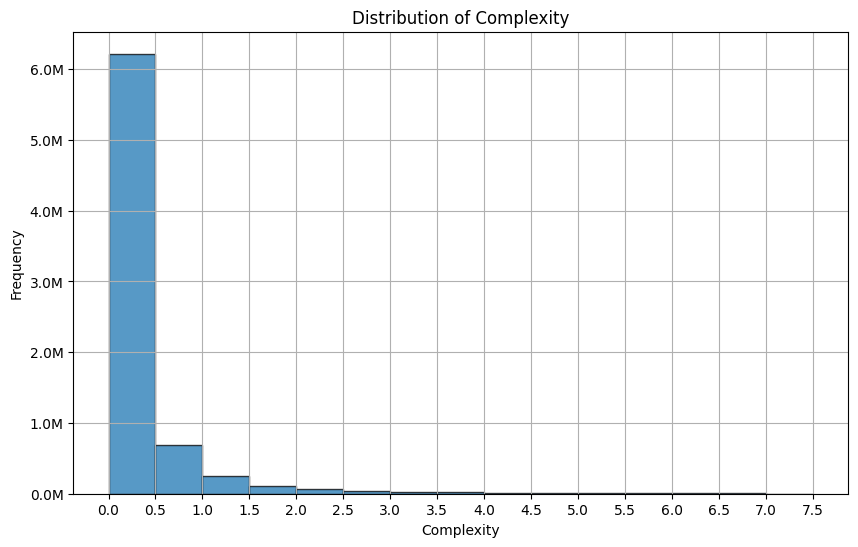

In [75]:
show_plot(metadata[metadata['complexity'] < 10]['complexity'], bin_width=0.5, bin_number=16)

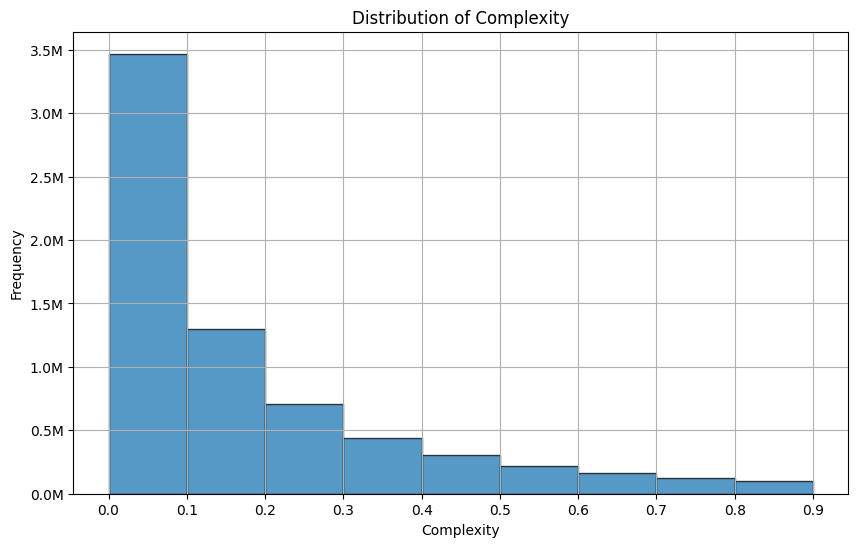

In [76]:
show_plot(metadata[metadata['complexity'] < 2]['complexity'], bin_width=0.1, bin_number=10)

#### .py files

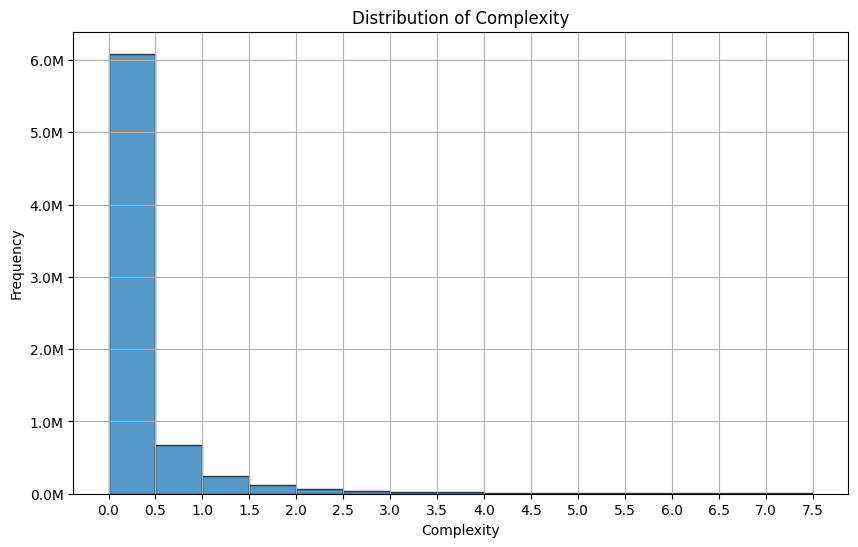

In [77]:
show_plot(metadata[(metadata['complexity'] < 10) & (metadata['is_ipynb'] == False)]['complexity'], bin_width=0.5, bin_number=16)

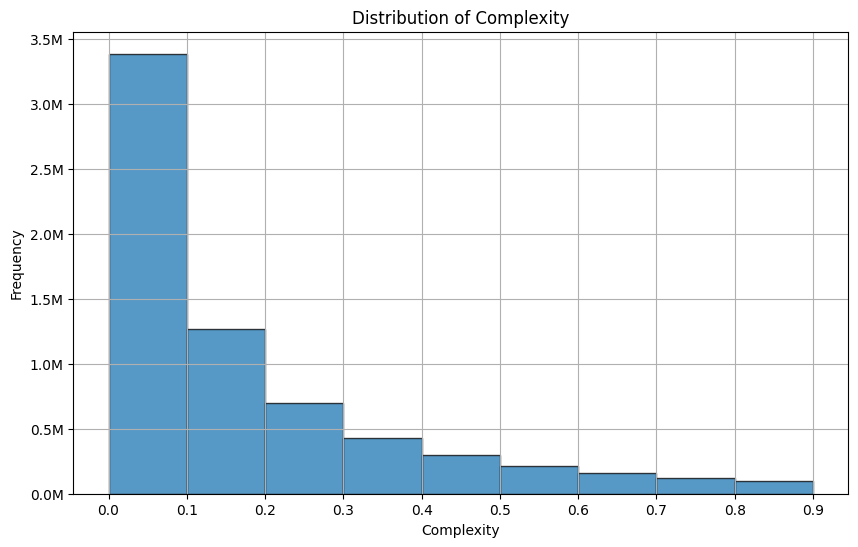

In [78]:
show_plot(metadata[(metadata['complexity'] < 2) & (metadata['is_ipynb'] == False)]['complexity'], bin_width=0.1, bin_number=10)

#### .ipynb files

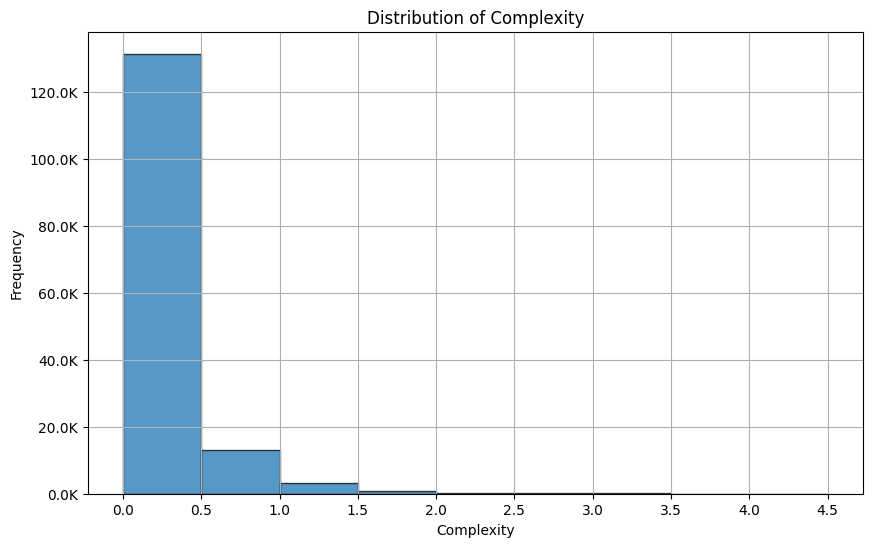

In [81]:
show_plot(metadata[(metadata['complexity'] < 10) & (metadata['is_ipynb'] == True)]['complexity'], bin_width=0.5, bin_number=10, format_scale='k')

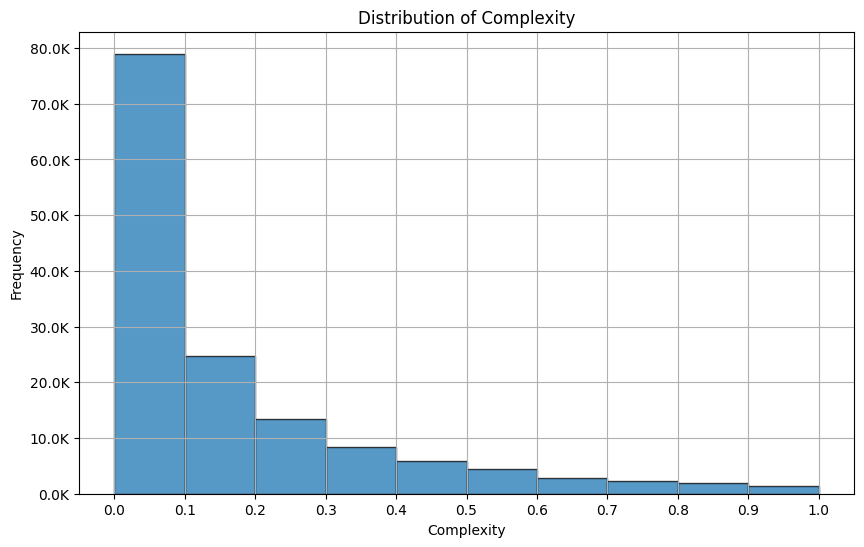

In [83]:
show_plot(metadata[(metadata['complexity'] < 2) & (metadata['is_ipynb'] == True)]['complexity'], bin_width=0.1, bin_number=11, format_scale='k')